In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
plt.rcParams['figure.figsize'] = (10,6)
pd.set_option("display.precision", 2)
pd.set_option("display.max_colwidth", 60)
pd.set_option("display.max_columns", 100)
plt.style.use("dark_background")

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Data Overview

In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
bank.describe(exclude=[])

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


### Quick analysis of categorical data

In [7]:
bank.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [7]:
# Count the amount of customers by occupation
bank['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

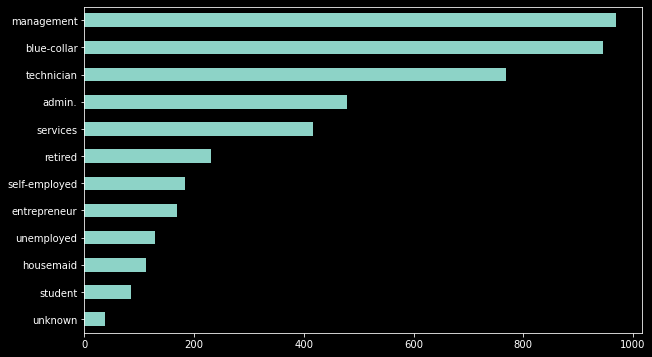

In [10]:
# Plot the amount of customers by occupation
bank['job'].value_counts().sort_values().plot.barh();

In [11]:
# Count the customers by marital status
bank['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

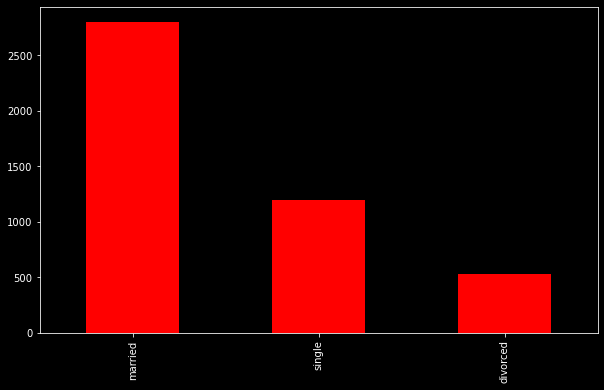

In [16]:
# Plot the customers by marital status
bank['marital'].value_counts().sort_values(ascending=False).plot.bar(color='red');

In [15]:
# Count the amount of customers by education
bank['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<AxesSubplot:>

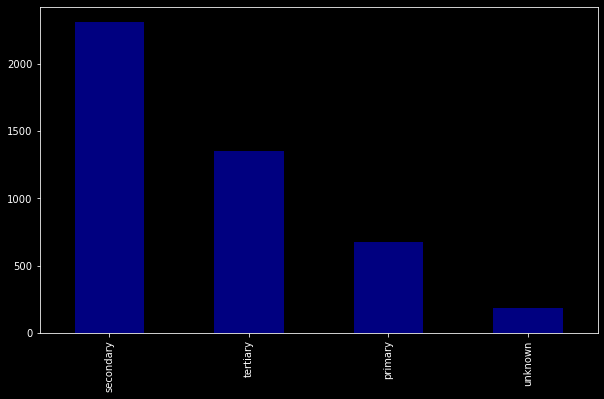

In [6]:
# Plot the amount of customers by education
bank['education'].value_counts().plot.bar(color="navy")

In [8]:
# Count the amount of customers in default
bank['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

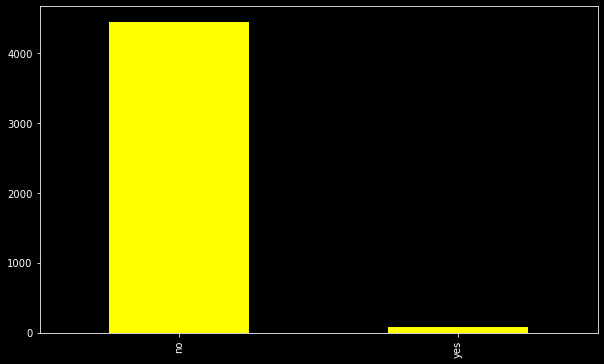

In [11]:
# Plot the amount of customers in default
bank['default'].value_counts().plot.bar(color="yellow");

### A new data frame with people in default

In [12]:
default = bank[bank['default'] == 'yes']
default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
48,32,entrepreneur,single,primary,yes,-849,yes,yes,cellular,4,feb,204,1,-1,0,unknown,no
71,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
124,51,management,single,tertiary,yes,-55,yes,no,cellular,11,may,281,2,266,6,failure,no
132,43,blue-collar,married,unknown,yes,-715,yes,no,unknown,30,may,67,3,-1,0,unknown,no
152,45,unemployed,divorced,primary,yes,-249,yes,yes,unknown,1,jul,92,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,31,self-employed,single,tertiary,yes,-282,yes,no,cellular,20,nov,131,3,-1,0,unknown,no
4257,32,services,married,secondary,yes,-220,yes,yes,cellular,25,jul,123,2,-1,0,unknown,no
4279,31,housemaid,married,unknown,yes,-6,no,yes,telephone,7,jul,94,2,-1,0,unknown,no
4317,27,services,single,secondary,yes,-1,no,no,cellular,22,jul,60,2,-1,0,unknown,no


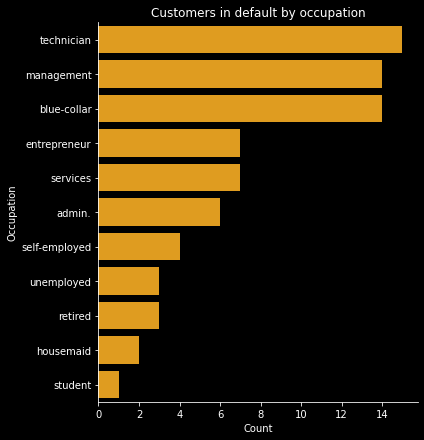

In [16]:
# Let's plot the people in default by occupation
sns.catplot(data=default, y='job', kind='count',
           color='orange', 
           order=default['job'].value_counts().index,
           height=6)

plt.title("Customers in default by occupation")
plt.ylabel('Occupation')
plt.xlabel('Count');

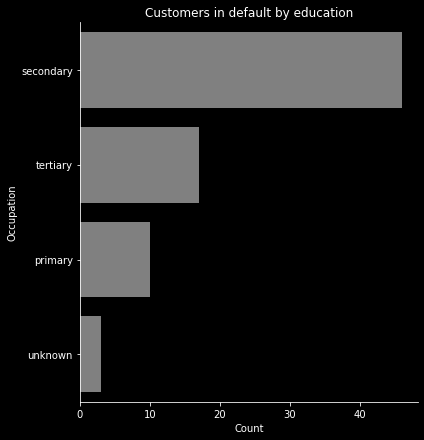

In [17]:
# Let's make a similar plot, but with education
sns.catplot(data=default, y='education', kind='count', color="gray",
           order=default['education'].value_counts().index,
           height=6)

plt.title("Customers in default by education")
plt.ylabel('Occupation')
plt.xlabel('Count');

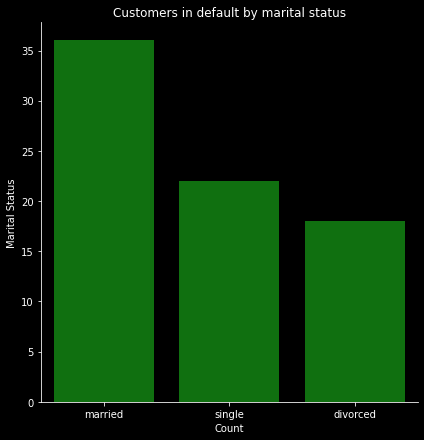

In [19]:
# The final plot could be by marital status
sns.catplot(data=default, x='marital', kind='count',
           color='green',
           order = default['marital'].value_counts().index,
           height=6)

plt.title('Customers in default by marital status')
plt.xlabel('Count')
plt.ylabel('Marital Status');

In [20]:
# In summary, the people who is in default: probably are technicians, management or blue collars workers. 
# They have secondary school grade, and they are probably married

### Grouping the dataset by jobs

In [21]:
jobs = bank.groupby(['job'])
jobs

In [22]:
bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [27]:
# Let's look for people who are unemployed and have a loan for more than 365 days
jobs.get_group('unemployed').query('duration > 365').head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
99,31,unemployed,single,primary,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes
328,35,unemployed,married,secondary,no,978,no,no,cellular,29,dec,1370,3,209,3,success,yes
505,31,unemployed,married,secondary,no,296,yes,no,unknown,20,may,378,3,-1,0,unknown,no
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no
1065,30,unemployed,married,tertiary,no,0,yes,no,cellular,18,nov,756,1,-1,0,unknown,no
1161,29,unemployed,single,tertiary,no,991,no,no,cellular,5,feb,563,1,-1,0,unknown,no
1265,31,unemployed,married,tertiary,no,7744,no,no,cellular,26,aug,377,8,-1,0,unknown,no
1407,36,unemployed,single,tertiary,no,9019,yes,no,unknown,11,jun,952,3,-1,0,unknown,no
1668,28,unemployed,married,secondary,no,655,yes,no,unknown,4,jun,606,2,-1,0,unknown,no
1773,37,unemployed,married,unknown,no,4565,no,no,cellular,4,sep,369,1,-1,0,unknown,no


In [28]:
# The duration in days could be a little hard to interpreted 
# maybe we can create a new column and have the values in years
bank['years'] = bank['duration']/365
bank['years']

0       0.22
1       0.60
2       0.51
3       0.55
4       0.62
        ... 
4516    0.90
4517    0.42
4518    0.41
4519    0.35
4520    0.95
Name: years, Length: 4521, dtype: float64

In [32]:
# Now we can do the same query as before, but the result is easier to interpreted
(jobs.get_group('unemployed')
     .query('years > 1')
     .head(10)
     .sort_values(by="years", ascending=False))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,years
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no,8.29
328,35,unemployed,married,secondary,no,978,no,no,cellular,29,dec,1370,3,209,3,success,yes,3.75
1407,36,unemployed,single,tertiary,no,9019,yes,no,unknown,11,jun,952,3,-1,0,unknown,no,2.61
1065,30,unemployed,married,tertiary,no,0,yes,no,cellular,18,nov,756,1,-1,0,unknown,no,2.07
99,31,unemployed,single,primary,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes,2.02
1668,28,unemployed,married,secondary,no,655,yes,no,unknown,4,jun,606,2,-1,0,unknown,no,1.66
1161,29,unemployed,single,tertiary,no,991,no,no,cellular,5,feb,563,1,-1,0,unknown,no,1.54
505,31,unemployed,married,secondary,no,296,yes,no,unknown,20,may,378,3,-1,0,unknown,no,1.04
1265,31,unemployed,married,tertiary,no,7744,no,no,cellular,26,aug,377,8,-1,0,unknown,no,1.03
1773,37,unemployed,married,unknown,no,4565,no,no,cellular,4,sep,369,1,-1,0,unknown,no,1.01


In [38]:
# Maybe not only unemployed people have a long term loan
# We could check the max duration in years for all the people in the dataset
jobs['years'].max().sort_values( ascending=False)

job
unemployed       8.29
entrepreneur     7.59
blue-collar      6.73
management       5.72
technician       5.56
services         5.40
self-employed    5.14
admin.           4.69
housemaid        4.27
retired          3.80
student          3.08
unknown          2.16
Name: years, dtype: float64

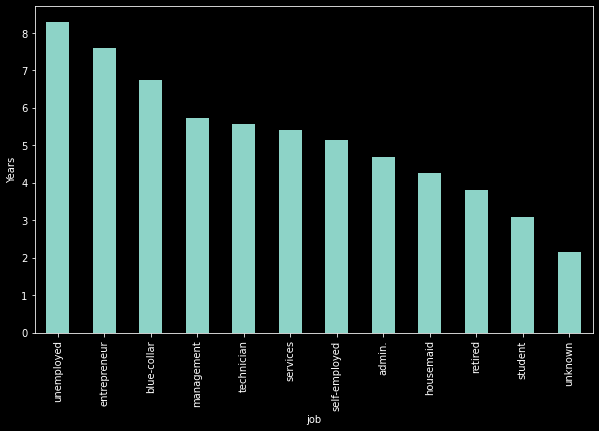

In [45]:
# It seems that unemeployed, entrepeneur and blue-collar are the ocuppations with max long term loans
jobs['years'].max().sort_values( ascending=False).plot.bar(ylabel="Years");

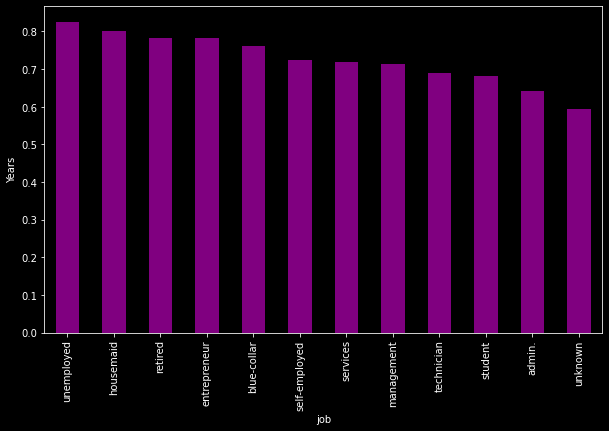

In [46]:
# But what happens if we change the measure from max() to mean()
# It seems that Unemployed, Housedmaid and Retired are the first three places
jobs['years'].mean().sort_values( ascending=False).plot.bar(ylabel="Years", color="purple");

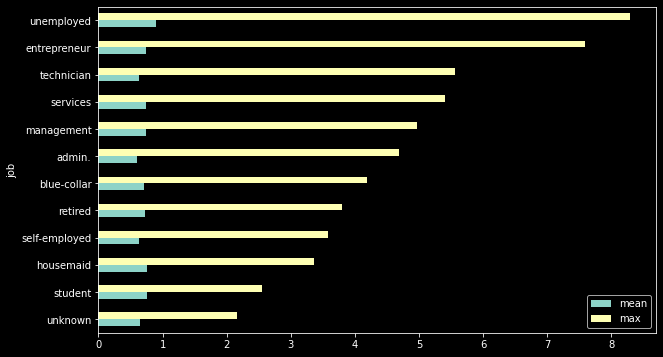

In [50]:
# Lets group by jobs and the loan years, but before do a query by marital status
(bank.query('marital == "married"')
 .groupby('job')['years']
 .agg(['mean', 'max'], numeric_only=True)
 .sort_values(by='max').plot.barh(ylabel="Years"));

### Grouping the dataset by age

In [51]:
ages = bank.groupby(['age'])

In [52]:
# The ages with most people in default
ages['default'].count().sort_values(ascending=False).head(20)

age
34    231
32    224
31    199
36    188
33    186
35    180
37    161
38    159
30    150
40    142
42    141
41    135
39    130
46    119
43    115
48    114
49    112
45    112
47    108
44    105
Name: default, dtype: int64

In [54]:
# Ages with negative balance
(bank.query('default == "yes"')
     .groupby(['age'])[['balance', 'job']]
     .min()
     .sort_values(by='balance')
     .head(15))

,balance,job
age,,
57,-3313,blue-collar
51,-2082,entrepreneur
49,-1680,entrepreneur
43,-1164,blue-collar
32,-849,admin.
30,-770,blue-collar
47,-614,blue-collar
25,-589,blue-collar
27,-584,admin.


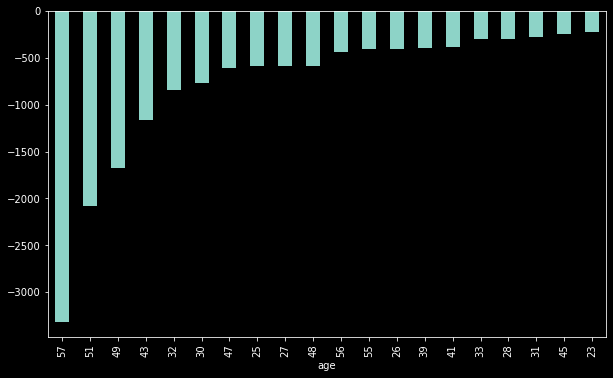

In [56]:
# Plot ages with negative balance
(bank.query('default == "yes"')
 .groupby(['age'])['balance']
 .min().sort_values().head(20)
 .plot.bar());

In [61]:
# Plot the Relation between age and debt years and color by default condition
fig = px.scatter(bank, x='age', y="years", color='default',
          labels={'age':'Age', 'years':'Years'})
fig.update_layout(title='Relation between age and debt years')    

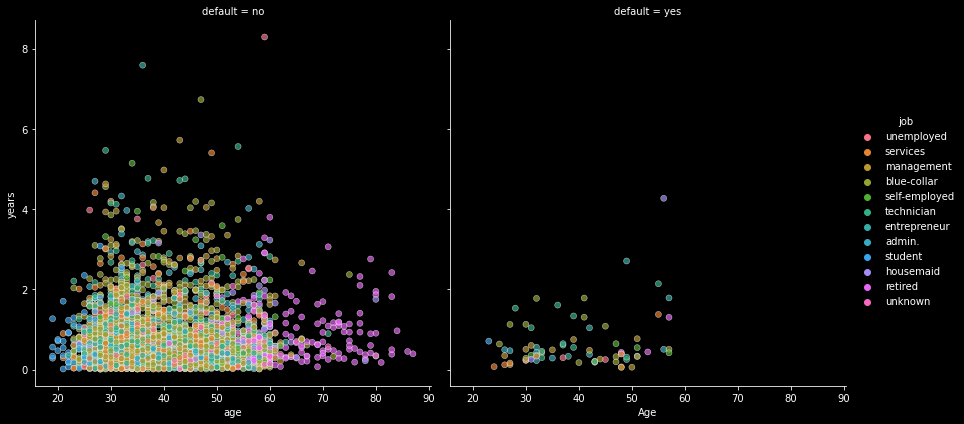

In [62]:
# We can do something similar with Seaborn
sns.relplot(data=bank, x='age', y = 'years', hue='job', col="default", height=6, alpha=.7)
plt.xlabel('Age')
plt.ylabel('Debt years');

### Relation in numerical variables

In [63]:
bank_corr = bank.corr()
bank_corr

,age,balance,day,duration,campaign,pdays,previous,years
age,1.00e+00,8.38e-02,-1.79e-02,-2.37e-03,-5.15e-03,-8.89e-03,-3.51e-03,-2.37e-03
balance,8.38e-02,1.00e+00,-8.68e-03,-1.59e-02,-9.98e-03,9.44e-03,2.62e-02,-1.59e-02
day,-1.79e-02,-8.68e-03,1.00e+00,-2.46e-02,1.61e-01,-9.44e-02,-5.91e-02,-2.46e-02
duration,-2.37e-03,-1.59e-02,-2.46e-02,1.00e+00,-6.84e-02,1.04e-02,1.81e-02,1.00e+00
campaign,-5.15e-03,-9.98e-03,1.61e-01,-6.84e-02,1.00e+00,-9.31e-02,-6.78e-02,-6.84e-02
pdays,-8.89e-03,9.44e-03,-9.44e-02,1.04e-02,-9.31e-02,1.00e+00,5.78e-01,1.04e-02
previous,-3.51e-03,2.62e-02,-5.91e-02,1.81e-02,-6.78e-02,5.78e-01,1.00e+00,1.81e-02
years,-2.37e-03,-1.59e-02,-2.46e-02,1.00e+00,-6.84e-02,1.04e-02,1.81e-02,1.00e+00


<AxesSubplot:>

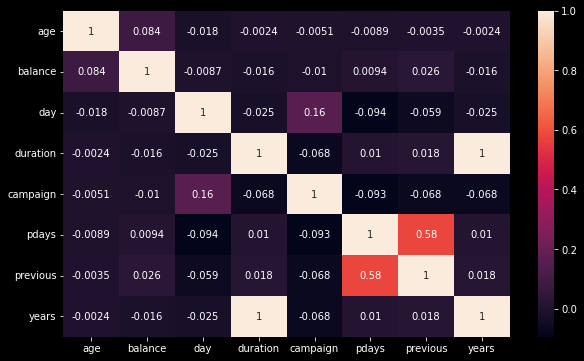

In [65]:
# There is not significant correlation between variables
sns.heatmap(bank_corr, annot=True)

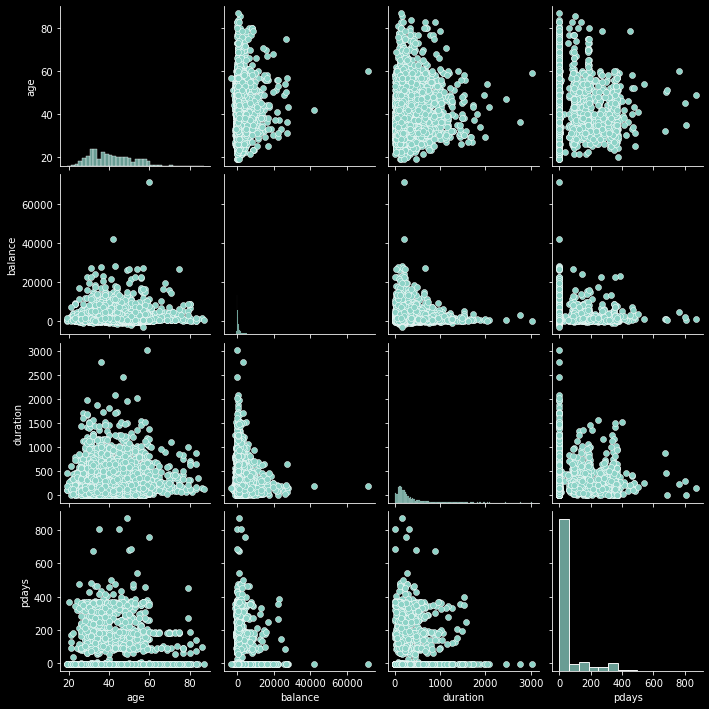

In [72]:
# We can find out plotting some variables
sns.pairplot(bank[['age', 'balance', 'duration', 'pdays']]);

Text(25.505598958333337, 0.5, 'Years')

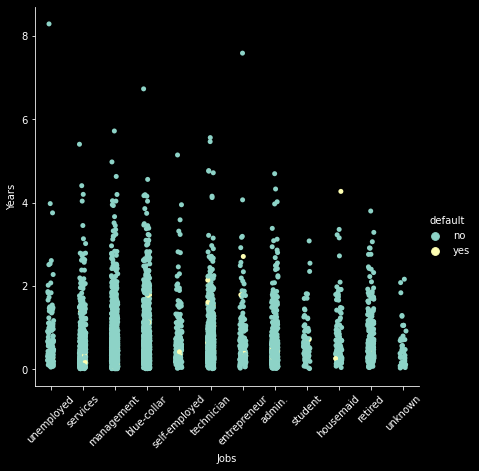

In [74]:
# We can also see the distribution of categorial variables
sns.catplot(data=bank, x='job', y='years', height=6, hue='default')
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.xlabel('Jobs')
plt.ylabel('Years')

### Principal Components Analysis

In [75]:
from sklearn.decomposition import PCA

In [78]:
# Columns to include in the PCA
columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'years']

In [79]:
# Create the PCA objet with the number of components
pca = PCA(n_components=3)

In [80]:
# Fitthe PCA to the data
pca.fit(bank[columns])

PCA(n_components=3)

In [81]:
# Transform the data using PCA
transformed = pca.transform(bank[columns])

In [82]:
# Create a new data frame with the transform data
pca_df = pd.DataFrame(transformed, columns=['PC1', 'PC2', 'PC3'])

In [88]:
pca_df

,PC1,PC2,PC3
0,364.33,-40.89,-11.41
1,3366.43,298.24,-8.75
2,-72.57,290.25,-5.93
3,53.33,-40.68,-10.74
4,-1422.66,-40.25,18.61
...,...,...,...
4516,-1755.67,-40.32,-8.19
4517,-4735.67,-39.24,17.44
4518,-1127.67,-40.48,15.99
4519,-285.61,171.42,-12.59


In [85]:
# Explained variance ratio of each component
# Almost 100% of the variance is concentrated in the first PCA= 0.99 or 99%
pca.explained_variance_ratio_

array([9.98873476e-01, 1.10551961e-03, 1.22536065e-05])

Text(0, 0.5, 'PC2')

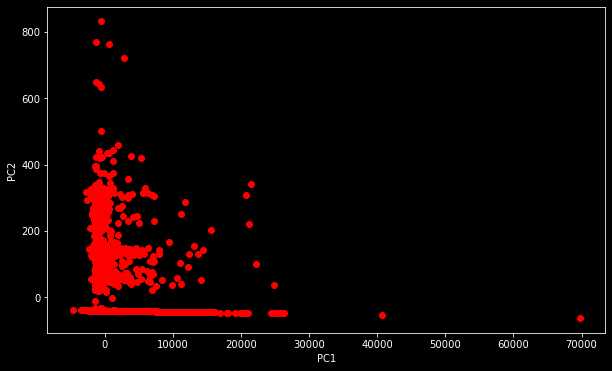

In [87]:
# Plot the PCA
# Plot the first two PCA
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')

### Cluster Analysis

In [90]:
from sklearn.cluster import KMeans

In [92]:
features = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'years']
X= bank[features]

In [93]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [94]:
bank['cluster'] = kmeans.labels_

In [96]:
bank['cluster'].value_counts()

1    3673
0     675
2     150
3      23
Name: cluster, dtype: int64

In [111]:
# We can check the smaller cluster, number 3 to see what is happening
# It seems that a higher balance define this cluster
bank[bank['cluster'] == 3].head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,years,cluster
650,33,housemaid,single,tertiary,no,23663,yes,no,cellular,16,apr,199,2,146,2,failure,no,0.55,3
871,31,housemaid,single,primary,no,26965,no,no,cellular,21,apr,654,2,-1,0,unknown,yes,1.79,3
877,30,management,single,tertiary,no,19358,no,no,cellular,19,nov,258,2,-1,0,unknown,no,0.71,3
1031,49,retired,single,primary,no,25824,no,no,unknown,17,jun,94,1,-1,0,unknown,no,0.26,3
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,jun,164,7,-1,0,unknown,no,0.45,3
1821,51,housemaid,married,unknown,no,21244,no,yes,cellular,4,aug,166,2,-1,0,unknown,no,0.45,3
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no,0.19,3
2196,54,management,divorced,tertiary,no,26306,yes,no,cellular,11,feb,27,1,84,3,failure,no,0.07,3
2624,53,entrepreneur,married,tertiary,no,22370,yes,no,unknown,15,may,106,1,-1,0,unknown,no,0.29,3
2776,37,management,married,primary,no,22856,no,no,cellular,2,jul,154,1,388,1,failure,no,0.42,3


In [115]:
# Let's check the cluster number 1
bank[bank['cluster'] == 1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,years,cluster
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0.22,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0.51,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0.55,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0.62,1
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,0.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0.90,1
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0.42,1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0.41,1
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0.35,1


In [116]:
# We can plot the clusters in plotly
fig = px.scatter(bank, x='pdays', y='balance', color='cluster',
                hover_data=['marital', 'education'])
fig

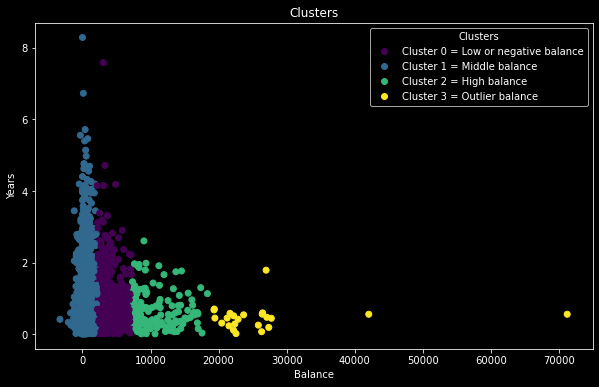

In [120]:
# We can do the same plot in matplotlib

# create a scatter plot with color-coded clusters
scatter = plt.scatter(bank['balance'], bank['years'], c=bank['cluster'])

# add legend
legend = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")

# set legend labels
legend.get_texts()[0].set_text('Cluster 0 = Low or negative balance')
legend.get_texts()[1].set_text('Cluster 1 = Middle balance')
legend.get_texts()[2].set_text('Cluster 2 = High balance' )
legend.get_texts()[3].set_text('Cluster 3 = Outlier balance')

# add axis labels and title
plt.xlabel('Balance')
plt.ylabel('Years')
plt.title('Clusters')

# show the plot
plt.show()


In [105]:
# The variable that defines the clusters is balance 